# Installations

In [ ]:
!pip install openai==1.55.3 httpx==0.27.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.6/389.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4


In [ ]:
# !pip install --upgrade openai

# Setting up your Environment

In [ ]:
import os
from google.colab import userdata

def set_env_variable(key, value):
    if value:
        os.environ[key] = value
        print(f"Environment variable {key} set successfully.")
    else:
        print(f"Warning: {key} is not available in userdata.")

# Get GEMINI_API_KEY from userdata
gemini_api_key = userdata.get('GEMINI_API_Key')  # Ensure the key is correctly named

# Set environment variables
set_env_variable("GEMINI_API_KEY", gemini_api_key)  # Use uppercase for environment variables

Environment variable GEMINI_API_KEY set successfully.


# Example 1

How can you use the Gemini model to create clear explanations or generate creative content through a chat completion request?

In [ ]:
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI(
    api_key= gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/"
)
# Make a chat completion request
response = client.chat.completions.create(
    model="gemini-1.5-flash",
    messages=[
        {"role": "system", "content": "You are an expert in explaining complex topics."},
        {"role": "user", "content": "Explain how AI could create a personalized bedtime story for a child in real-time?"}
    ]
)
# Print the response
print(response.choices[0].message.content)

Creating a personalized bedtime story in real-time using AI requires a sophisticated system integrating several advanced technologies.  It's not simply about plugging keywords into a template; true personalization demands a deep understanding of the child's preferences and the ability to generate coherent, engaging narratives on the fly. Let's break down the components:

**1. Data Acquisition and Profiling:**

* **Child's Profile:**  The system needs a profile of the child, gathered ethically and with parental consent. This could include:
    * **Age:** Dictates vocabulary, sentence structure complexity, and thematic appropriateness.  A story for a 3-year-old will differ vastly from one for a 10-year-old.
    * **Interests:**  Favorites animals, colors, toys, activities, etc.  These are crucial for populating the story with relevant characters, settings, and plot elements.  This could be gleaned from previous interactions, parental input, or even analyzing the child's drawings (using i

In [ ]:
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI(
    api_key= gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/"
)
# Make a chat completion request
response = client.chat.completions.create(
    model="gemini-1.5-flash",
    messages=[
        {"role": "system", "content": "You are an expert in explaining complex topics."},
        {"role": "user", "content": "What is google devfest?"}
    ]
)
# Print the response
print(response.choices[0].message.content)

Google DevFest is a community-organized developer festival spanning a single day or multiple days, focused on providing a collaborative learning experience for developers of all skill levels.  It's not a single, monolithic event, but rather a globally distributed series of independently organized events, all sharing a common brand and overarching goals.  Think of it as a franchise model, where local developer communities receive support and resources from Google to host their own DevFests.

Here's a breakdown of key aspects highlighting the nuances often missed in simpler explanations:

**Key Characteristics of Google DevFest:**

* **Community-Led, Google-Supported:**  This is crucial.  While Google provides branding, resources (sometimes including sponsorship funding), and access to speakers and technologies, the events themselves are conceived, organized, and executed by local developer communities. This means the specific content and focus often reflect the local tech scene's intere

# Example 2

How can you use the Gemini model to generate well-structured responses for tasks that need clear formatting and detailed information?

Simple - Function calling makes it easier for you to get structured data outputs from generative models and is supported in the Gemini API.

In [ ]:
from openai import OpenAI

client = OpenAI(
    api_key= gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

tools = [
  {
    "type": "function",
    "function": {
      "name": "get_weather",
      "description": "Get the weather in a given location",
      "parameters": {
        "type": "object",
        "properties": {
          "location": {
            "type": "string",
            "description": "The city and state, e.g. Chicago, IL",
          },
          "unit": {"type": "string", "enum": ["celsius", "fahrenheit"]},
        },
        "required": ["location"],
      },
    }
  }
]

messages = [{"role": "user", "content": "What's the weather like in Chicago today?"}]
response = client.chat.completions.create(
  model="gemini-1.5-flash",
  messages=messages,
  tools=tools,
  tool_choice="auto"
)

print(response)

ChatCompletion(id=None, choices=[Choice(finish_reason=None, index=0, logprobs=None, message=ChatCompletionMessage(content=None, refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, toolCalls=[{'function': {'arguments': '{"location":"Chicago, IL"}', 'name': 'get_weather'}, 'id': '0', 'type': 'function'}]), finishReason='stop')], created=1734746439, model='gemini-1.5-flash', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=None, prompt_tokens=None, total_tokens=None, completion_tokens_details=None, prompt_tokens_details=None, completionTokens=7, promptTokens=84, totalTokens=91))


The model understood you were asking about the weather and tried to use a special tool (the get_weather function) to get the information. However, something went wrong, possibly because the tool wasn't fully built or the model can't directly access weather data. So, it ended up not providing the actual weather.

# Example 3

Gemini models are designed to understand both text and images, delivering top-notch performance for common vision tasks.

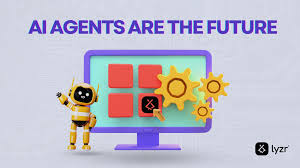

In [ ]:
import base64
from openai import OpenAI

client = OpenAI(
    api_key= gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Getting the base64 string
base64_image = encode_image("/content/Agents.jpg")

response = client.chat.completions.create(
  model="gemini-1.5-flash",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What is in this image?",
        },
        {
          "type": "image_url",
          "image_url": {
            "url":  f"data:image/jpeg;base64,{base64_image}"
          },
        },
      ],
    }
  ],
)

print(response.choices[0])

Choice(finish_reason=None, index=0, logprobs=None, message=ChatCompletionMessage(content='That\'s a promotional image advertising AI agents.\n\nSpecifically, it shows:\n\n* **The Headline:** "AI AGENTS ARE THE FUTURE" in large, bold text.  This is the main message.\n* **A 3D Rendered Illustration:** The image features a cute, cartoonish robot standing next to a computer screen. The screen displays a grid interface with several blocks.  Gears are also shown interacting with the grid, suggesting a process or mechanism. The style is playful and approachable, aiming to make the complex subject of AI agents seem less intimidating.\n* **A Logo:** The Lyzr logo is in the bottom right corner, suggesting this is promotional material for a company involved in AI agent technology.\n\nIn short, the image is designed to be visually appealing and promote the idea that AI agents are a significant upcoming technology.\n', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None)

# Example 4
Gemini models can create JSON objects in any structure you need, making it easy to organize and format data for your applications.

In [ ]:
from pydantic import BaseModel
from openai import OpenAI

client = OpenAI(
    api_key= gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

class CalendarEvent(BaseModel):
    name: str
    date: str
    participants: list[str]

completion = client.beta.chat.completions.parse(
    model="gemini-1.5-flash",
    messages=[
        {"role": "system", "content": "Extract the event information."},
        {"role": "user", "content": "Siva and Vishal are going to an Devfest conference on Saturday."},
    ],
    response_format=CalendarEvent,
)

print(completion.choices[0].message.parsed)

name='Devfest conference' date='Saturday' participants=['Siva', 'Vishal']


We can see how the model extract the event details (name, date, participants) from the conversation and format it into a CalendarEvent. This is cool right! When you can parse natural language conversation about an event and convert it into a structured format suitable for calendar applications or other event management purposes.

# Example 5

Gemini models can create text embeddings, which measure how similar different pieces of text are. This is especially useful for tasks like search, recommendation systems, or clustering related information.

In [ ]:
from openai import OpenAI

client = OpenAI(
    api_key= gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)

response = client.embeddings.create(
    input="DevFest is a global tech conference hosted by Google Developer Groups (GDGs).",
    model="text-embedding-004"
)

print(response.data[0].embedding)

[0.0021586427465081215, -0.03293360024690628, -0.07426734268665314, 0.007265171036124229, -0.06530175358057022, 0.035685036331415176, 0.03006521612405777, 0.05052141472697258, 0.025103408843278885, -0.011787735857069492, -0.021230977028608322, 0.024196764454245567, 0.03533056378364563, 0.01269074622541666, 0.0012736762873828411, -0.008689312264323235, -0.0300375297665596, 0.01114859152585268, -0.08675312995910645, 0.02738945186138153, -0.04500183090567589, -0.04844023287296295, -0.023941077291965485, 0.049129419028759, -0.04913712665438652, -0.0254242941737175, -0.011197279207408428, 0.044981442391872406, -0.01543339341878891, 0.03551740199327469, -0.009350009262561798, 0.013772102072834969, 0.01556518953293562, 0.037711627781391144, -0.041184816509485245, 0.03492927923798561, 0.01687024161219597, -0.037144821137189865, 0.013405459932982922, -0.0383523553609848, 0.01095657516270876, -0.0032002446241676807, 0.001027419464662671, 0.09306662529706955, -0.003513005096465349, 0.001136296777

We notice that response will contain a list of embeddings, which are numerical representations of the input text. You can use these embeddings to compare different pieces of text or to find similar text in a large dataset.

# Current limitations
Support for the OpenAI libraries is still in beta while we extend feature support.